In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [54]:
silent = True
%run ../dataLoadAndPrepare.ipynb

# Klassifikationsproblem
Diamanten in eine kategorische Variable einordnen

### Ziel:
Qualität des Schliffs eines Diamanten, durch diskrete Merkmale vorherzusagen.  
Das Modell soll in der Lage sein Diamanten in eine der Klassen der Kategorie cut einzuordnen

Klassen der Kategorie `cut`:  
- Fair
- Good
- Very Good
- Premium
- Ideal

Attribute nach welchen in Klassen zugeordnet wird:
- carat (float)
- color (str)
- clarity (str)
- x (float)
- y (float)
- z (float)
- depth (float)
- table (int)
- price (int)


# Klassifikationsproblem
Diamanten in eine kategorische Variable einordnen

### Ziel:
Qualität des Schliffs eines Diamanten, durch diskrete Merkmale vorherzusagen.  
Das Modell soll in der Lage sein Diamanten in eine der Klassen der Kategorie cut einzuordnen

Klassen der Kategorie `cut`:  
- Fair
- Good
- Very Good
- Premium
- Ideal

Attribute nach welchen in Klassen zugeordnet wird:
- carat (float)
- x (float)
- y (float)
- z (float)
- depth (float)
- table (int)
- price (int)


In [55]:
# # Unwichtige features entfernen
# df = df.drop(columns=['clarity', 'color', 'carat'])

In [56]:
# LabelEncoder für 'color' und 'clarity'
le_color = LabelEncoder()
le_clarity = LabelEncoder()

# Label Encoding anwenden
df['color'] = le_color.fit_transform(df['color'])
df['clarity'] = le_clarity.fit_transform(df['clarity'])

# Zeige das Ergebnis
display(df.head())


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75


In [57]:
# Zielvariable festlegen (cut) und in y speichern
y = df['cut']

print(f"\nDie Zielvariable 'cut' enthält folgende Ausprägungen: {y.unique().tolist()}")
print(f"\nAnzahl der verschiedenen Ausprägungen der Zielvariablen:\n{y.value_counts().sort_index()}")

# Inputdaten DataFrame erstellen
X = df.drop('cut', axis=1)
print(f"\nInputdaten DataFrame: {X.shape[1]} Spalten und {X.shape[0]} Zeilen")
print(f"\nDie Inputdaten sehen wie folgt aus:")
{display(X.head())}


Die Zielvariable 'cut' enthält folgende Ausprägungen: ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

Anzahl der verschiedenen Ausprägungen der Zielvariablen:
cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: count, dtype: Int64

Inputdaten DataFrame: 9 Spalten und 53940 Zeilen

Die Inputdaten sehen wie folgt aus:


,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75


{None}

In [58]:
# Label Encoding
# Die Zielvariable 'cut' wird in numerische Werte umgewandelt
# Die einzelnen Werte von cut sind dann nicht mehr als Kategorien, sondern als Zahlen repräsentiert
# Label Encoding ist notwendig, da so eine natürliche Ordnung der Kategorien hergestellt wird
# Die Ordnung ist wie folgt: Fair < Good < Very Good < Premium < Ideal

cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

y = df['cut'].map(cut_mapping)

display(y.head())


0    4
1    3
2    1
3    3
4    1
Name: cut, dtype: int64

In [59]:
# Aufteilung in Trainings- und Testdaten
# 80% der Daten werden für das Training verwendet, 20% für das Testen (zufällige Aufteilung)
# random_state wird auf 42 gesetzt, damit die Aufteilung reproduzierbar ist (immer die gleiche Aufteilung)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt']
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# print(f"Best hyperparameters: {grid_search.best_params_}")

#Fitting 5 folds for each of 36 candidates, totalling 180 fits
# Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# RandomForestClassifier Modell erstellen und trainieren
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_features="sqrt", max_depth=None, min_samples_leaf=1, min_samples_split=5)
# Modell trainieren
print("Trainiere Random Forest Modell...")
rf_model.fit(X_train, y_train)


Trainiere Random Forest Modell...


RandomForestClassifier(n_estimators=500, random_state=42)

In [62]:
# Vorhersagen machen
# Trainiertes Modell wird auf die Testdaten angewendet
y_predicted_test = rf_model.predict(X_test)       # Basierend auf den Testdaten wird der cut vorhergesagt

# Bewertung
print("Test Accuracy (RF):", accuracy_score(y_test, y_predicted_test))        # Hier wird verglichen wie gut die Vorhersagen (y_predicted_test) mit den echten Werten (y_test) übereinstimmen

# Detaillierter Bericht
print("\nDetaillierter Bericht (RF):")
#Ausgabe welche Klasse welcher index entspricht
print(f"\nMapping:{cut_mapping}\n")
print(classification_report(y_test, y_predicted_test))




Test Accuracy (RF): 0.7898591027067111

Detaillierter Bericht (RF):

Mapping:{'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       335
           1       0.80      0.70      0.75      1004
           2       0.69      0.55      0.61      2382
           3       0.78      0.81      0.79      2775
           4       0.83      0.92      0.87      4292

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.79     10788
weighted avg       0.78      0.79      0.78     10788



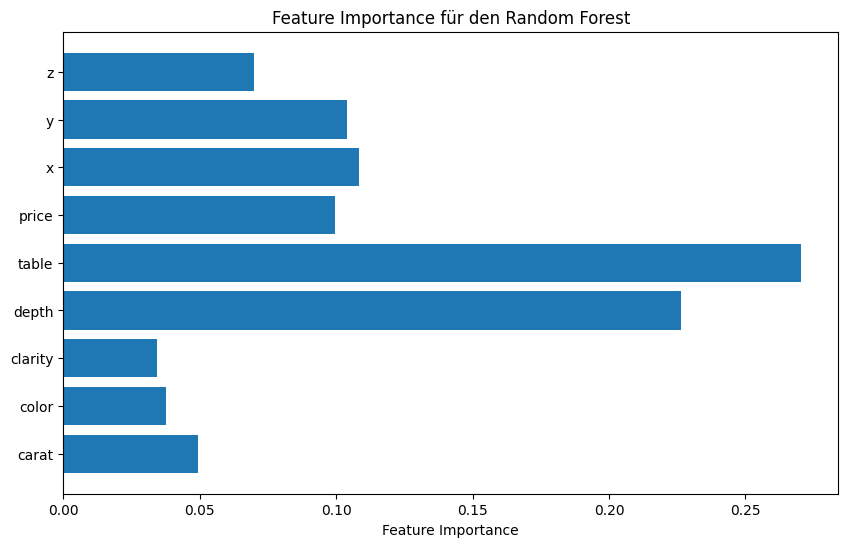

In [63]:

# Feature Importance anzeigen
importance = rf_model.feature_importances_
feature_names = X.columns

# Visualisierung der Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance für den Random Forest')
plt.show()


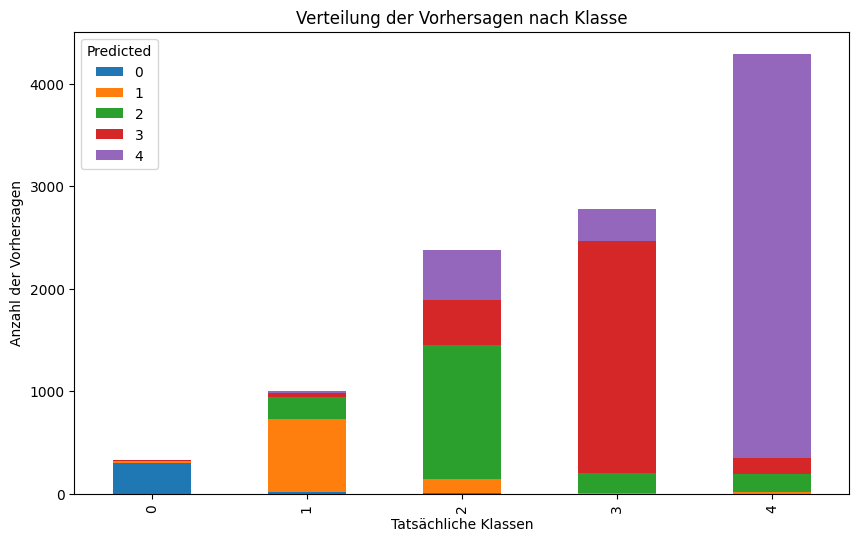

In [64]:
# Verteilung der Vorhersagen und tatsächlichen Werte
results = pd.DataFrame({
    'True': y_test,
    'Predicted': y_predicted_test
})

# Zähle die korrekten und falschen Vorhersagen für jede Klasse
class_distribution = pd.crosstab(results['True'], results['Predicted'], rownames=['True'], colnames=['Predicted'])
class_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Verteilung der Vorhersagen nach Klasse')
plt.xlabel('Tatsächliche Klassen')
plt.ylabel('Anzahl der Vorhersagen')
plt.show()


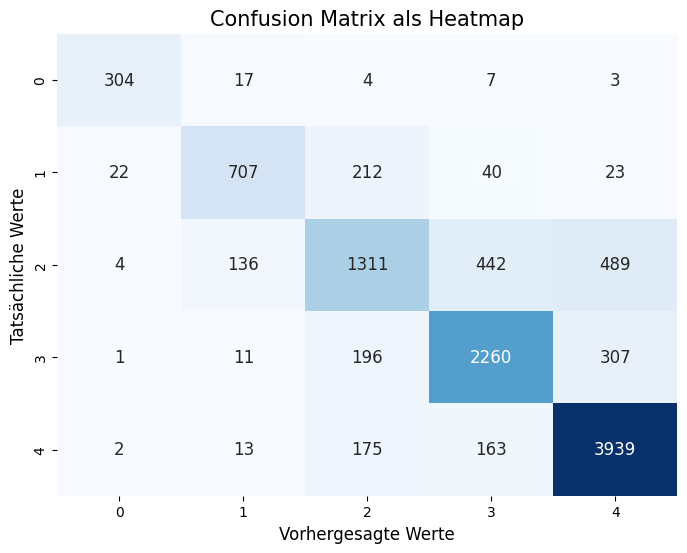

In [65]:
# Erstelle eine Kreuztabelle
confusion_matrix = pd.crosstab(y_test, y_predicted_test, rownames=['Tatsächliche Werte'], colnames=['Vorhergesagte Werte'], margins=False)

# Visualisiere die Kreuztabelle als Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})

# Titel und Achsenbeschriftungen
plt.title('Confusion Matrix als Heatmap', fontsize=15)
plt.ylabel('Tatsächliche Werte', fontsize=12)
plt.xlabel('Vorhergesagte Werte', fontsize=12)

# Zeige das Diagramm
plt.show()


Erklärung:
- x-Achse die Werte die das Modell vorhergesagt hat
- y-Achse die Anzahl der Werte in die Klasse, in welche es tatsächlich gehört

Werte die auf Diagonale liegen passen

Off-diaganol Werte passen nicht  
Bsp. Unten links 2 Werte wurden zur Klasse 0 eingeordnet gehören aber tatsächlich zu Klasse 4  
==> 2 Diamanten wurden zur Klasse Fair eingeteilt obwohl sie eigentlich Ideal sind